In [45]:
from rosetta.core.pack.task import TaskFactory, parse_resfile
from rosetta.protocols.relax import *
from pyrosetta import *
from pyrosetta import pose_from_pdb, MoveMap
from pyrosetta.toolbox import cleanATOM, pose_from_rcsb, generate_resfile_from_pose
from pyrosetta.teaching import MinMover, PackRotamersMover
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../../../utils/')
import src_utils
import matplotlib.pyplot as plt

In [40]:
pyrosetta.init()

PyRosetta-4 2020 [Rosetta PyRosetta4.MinSizeRel.python35.mac 2020.11+release.ce6f14f37b41d7372ea79cca59fad6b33adc1596 2020-03-12T19:59:10] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python35.mac r249 2020.11+release.ce6f14f37b4 ce6f14f37b41d7372ea79cca59fad6b33adc1596 http://www.pyrosetta.org 2020-03-12T19:59:10
core.init: command: PyRosetta -ex1 -ex2aro -database /opt/anaconda3/envs/pyrosetta/lib/python3.5/site-packages/pyrosetta-2020.11+release.ce6f14f37b4-py3.5-macosx-10.6-x86_64.egg/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-1295300236 seed_offset=0 real_seed=-1295300236
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-1295300236 RG_type=mt19937


# 1. Get poses from pdb and full structure

In [41]:
cleanATOM("2src_kinDom.pdb")
src_kin = pose_from_pdb('2src_kinDom.pdb')
# src_full = pose_from_rcsb('2SRC')
src_full = pose_from_pdb('2SRC.clean.pdb')

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 980 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.01438 seconds.
core.import_pose.import_pose: File '2src_kinDom.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 157
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 157
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 157
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 157
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LEU:CtermProteinFull 250
core.pack.pack_missing_sidechains: packing residue number 157 because of missing atom number 6 atom name  CG
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting en

# 2. Set score function

In [46]:
scorefxn = get_fa_scorefxn()

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


# 3. Relax

In [47]:
"""relax = ClassicRelax()
relax.set_scorefxn(scorefxn)
relax.apply(src_kin)

# Save pose to file
src_kin.dump_file('2src_kinDom_relax.pdb')"""

# Load in the pose 
# src_kin = pose_from_pdb('2src_kinDom_relax.pdb')

relax = ClassicRelax()
relax.set_scorefxn(scorefxn)
relax.apply(src_full)

# Save pose to file
src_full.dump_file('2src_full_relax.pdb')

protocols.relax.ClassicRelax: Setting up default relax setting
protocols.relax.ClassicRelax: 
protocols.relax.ClassicRelax: 
protocols.relax.ClassicRelax: ===================================================================
protocols.relax.ClassicRelax:    Stage 1
protocols.relax.ClassicRelax:    Ramping repulsives with 8 outer cycles and 1 inner cycles
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 14582 rotamers at 449 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 12248 rotamers at 449 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 11776 rotamers at 449 positions.
core.pack.interaction_graph.i

# 4. Minimize starting poses

In [67]:
"""min_mover = MinMover()
move_map = MoveMap()
move_map.set_bb(True)  # Allow ALL backbone atoms to move
min_mover.movemap(move_map)
min_mover.score_function(scorefxn)"""

'min_mover = MinMover()\nmove_map = MoveMap()\nmove_map.set_bb(True)  # Allow ALL backbone atoms to move\nmin_mover.movemap(move_map)\nmin_mover.score_function(scorefxn)'

In [68]:
"""scores = []
scores.append(scorefxn(src_kin))
for _ in np.arange(100):
    min_mover.apply(src_kin)
    scores.append(scorefxn(src_kin))"""

'scores = []\nscores.append(scorefxn(src_kin))\nfor _ in np.arange(100):\n    min_mover.apply(src_kin)\n    scores.append(scorefxn(src_kin))'

# 5. Generate resfile and edit

In [69]:
# Read in master spreadsheet
master_df = pd.read_csv('../../../utils/point_muts.csv', index_col=0, header=[0,1])
variant_index = src_utils.create_variant_index(master_df)
variant_index = variant_index[2:]

In [51]:
"""resfile = 'src_kin.resfile'
generate_resfile_from_pose(src_kin, resfile)
resfile_obj = open(resfile, 'a')
resfile_obj.write("271  A  PIKAA E") # Follows pdb numbering
resfile_obj.close()
"""

'resfile = \'src_kin.resfile\'\ngenerate_resfile_from_pose(src_kin, resfile)\nresfile_obj = open(resfile, \'a\')\nresfile_obj.write("271  A  PIKAA E") # Follows pdb numbering\nresfile_obj.close()\n'

# 6. Create design task

In [172]:
"""task_design = TaskFactory.create_packer_task(src_kin)
parse_resfile(src_kin, task_design, resfile)"""

'task_design = TaskFactory.create_packer_task(src_kin)\nparse_resfile(src_kin, task_design, resfile)'

# 7. Test on the first 10 mutants

In [71]:
resfile = 'src_full.resfile'
mut_scores = []
for idx, variant in enumerate(variant_index[:2]):
    
    # Skip nonsense mutations
    if '*' in variant:
        mut_scores.append(np.nan)
        continue
        
    # Get position and mutation
    pos = variant[1:-1]
    mut_AA = variant[-1]
    
    # Copy starting pose
    pose = Pose()
    pose.assign(src_full)
    
    # Generate new resfile
    generate_resfile_from_pose(pose, resfile)
    
    # Add mutation to resfile
    resfile_obj = open(resfile, 'a')
    resfile_obj.write("   {}  A  PIKAA {}".format(pos, mut_AA))
    resfile_obj.close()
    
    # Create design task
    task_design = TaskFactory.create_packer_task(pose)
    parse_resfile(pose, task_design, resfile)
    
    # Pack
    pack_mover = PackRotamersMover(scorefxn, task_design)
    pack_mover.apply(pose)
    
    # Append scores
    mut_scores.append(scorefxn(pose))

    print(idx)

core.pack.pack_rotamers: built 5880 rotamers at 449 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
0
core.pack.pack_rotamers: built 5870 rotamers at 449 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
1


In [53]:
mut_scores = [np.nan, np.nan] + mut_scores

In [54]:
rosetta_scores = pd.DataFrame(mut_scores, index=src_utils.create_variant_index(master_df))

In [55]:
rosetta_scores.to_csv('../../../utils/rosetta_full_scores.csv')

In [64]:
kin_scores = pd.read_csv('../../../utils/rosetta_scores.csv', index_col=0).values[:, 0]
full_scores = pd.read_csv('../../../utils/rosetta_full_scores.csv', index_col=0).values[:, 0]

In [14]:
residuals = pd.read_csv('../../../utils/residuals.csv', index_col=0)
diffsel = pd.read_csv('../../../utils/diffsel.csv', index_col=0)

radicicol = master_df.loc[:, ('Radicicol', 'score')].values
dmso = master_df.loc[:, ('Zero', 'score')].values

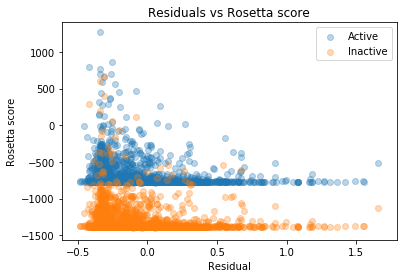

In [78]:
plt.scatter(residuals['raw_resids'], kin_scores, alpha=0.3, label='Active')
plt.scatter(residuals['raw_resids'], full_scores, alpha=0.3, label='Inactive')
plt.title('Residuals vs Rosetta score')
plt.xlabel('Residual')
plt.ylabel('Rosetta score')
plt.legend()
plt.show()

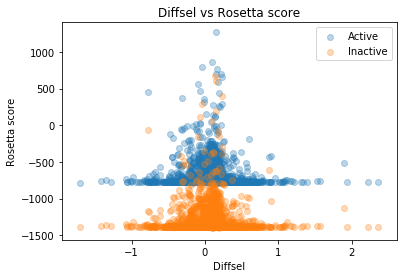

In [79]:
plt.scatter(diffsel['envision_scaled_diffsel'], kin_scores, alpha=0.3, label='Active')
plt.scatter(diffsel['envision_scaled_diffsel'], full_scores, alpha=0.3, label='Inactive')
plt.title('Diffsel vs Rosetta score')
plt.xlabel('Diffsel')
plt.ylabel('Rosetta score')
plt.legend()
plt.show()